<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/00.%EC%B6%94%EA%B0%80%ED%95%99%EC%8A%B5/github%EC%97%B0%EB%8F%99%EA%B3%BCpythonscript%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 로드

* 깃허브 레포지토리 복사

In [1]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 204 (delta 53), reused 61 (delta 38), pack-reused 119
Receiving objects: 100% (204/204), 20.05 MiB | 16.61 MiB/s, done.
Resolving deltas: 100% (75/75), done.


* weight 파일 다운로드 (용량이 큰 데이터는 깃허브에 저장 하지 않는걸 권장)

In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights

--2022-06-22 02:24:53--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  20.4MB/s    in 13s     

2022-06-22 02:25:06 (18.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## 세팅

* 라이브러리 임포트

In [3]:
PATH = '/content/SkillTreePython-DeepLearning/00.추가학습/data'
import sys
sys.path.append(PATH)
from detect_with_yolo import *

* 모델과 클래스 정보 로드 (한번만 실행)

In [4]:
weight_file = '/content/yolov3.weights'
cfg_file = f'/{PATH}/yolov3.cfg' 
name_file = f'/{PATH}/coco.names'
model, predict_layer_names = set_model(weight_file, cfg_file)
class_names, class_colors = set_label(name_file)

## 이미지 실행

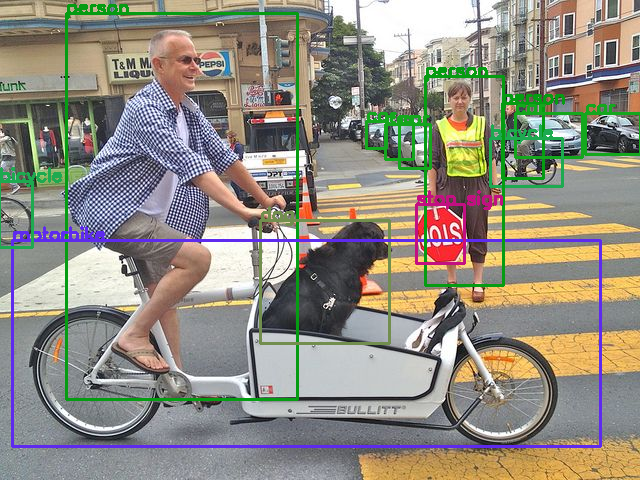

In [6]:
img_name = 'road_withanimals.jpg' #@param ['withanimals.jpg', 'withanimals2.jpg', 'road_withanimals.jpg', 'road_withanimals2.jpg', 'road.jpg'] 
img_path = f'/{PATH}/{img_name}'
img = cv2.imread(img_path)
img2detect(img, model, predict_layer_names, class_names, class_colors)

## 영상 실행

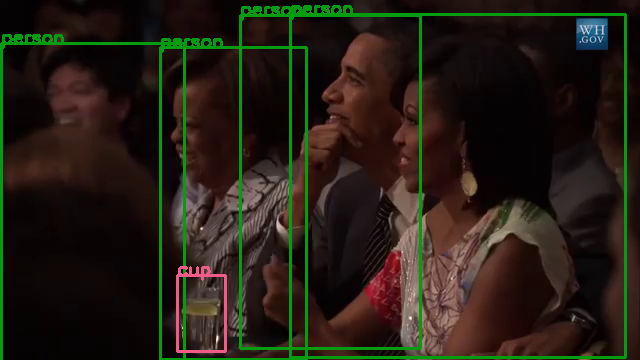

No frame !


In [10]:
cap = cv2.VideoCapture(f'{PATH}/short_hamilton_clip.mp4') # 비디오 캡쳐
while True:
  _, frame = cap.read() # 캡쳐로부터 비디오 프레임 얻기
  if frame is None: # 프레임 끝나면 종료
    print('No frame !')
    break
  img2detect(frame, model, predict_layer_names, class_names, class_colors)